Github repo with all code: https://github.com/pigunther/Intro2CV_project

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import cv2
import imageio as io

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
def string_to_list(list_str):
    list_str= list_str.replace('   ', ' ')\
                        .replace('  ', ' ') \
                        .replace('  ', ' ') \
                        .replace('[ ', '') \
                        .replace('[', '') \
                        .replace(' ]', '') \
                        .replace('] ', '') \
                        .replace(']', '') \
                        .replace('\n', '').split(' ')
    list_str = [int(s) for s in list_str]
    return list_str

In [169]:
kp_path = "../cv_project_staff/dataset2/state-farm-distracted-driver-detection/keypoints_list5.csv"
keypoint_dict = pd.read_csv(kp_path)
# keypoint_dict = pd.read_csv("git/dataset/state-farm-distracted-driver-detection/keypoints_list5.csv")

In [31]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [249]:
classes_dict = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

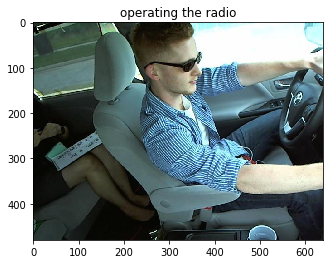

In [272]:
#plot random image with keypoints
ind = np.random.randint(keypoint_dict.iloc[:].shape[0])
row = keypoint_dict.iloc[ind]
kp_ind = string_to_list(row['keypoints'])
img_ind = row['img']
cl_ind = row['classname']
path = f'git/dataset/state-farm-distracted-driver-detection/imgs/train/{cl_ind}/{img_ind}'
img = io.imread(path)
plt.title(classes_dict[cl_ind])
# plt.scatter([kp_ind[i] for i in range(0, len(kp_ind), 2)], [kp_ind[i] for i in range(1, len(kp_ind), 2)], color='red')
plt.imshow(img)

In [267]:
string_to_list(row['keypoints'])

[231,
 133,
 242,
 108,
 202,
 122,
 263,
 98,
 175,
 130,
 311,
 164,
 222,
 233,
 399,
 188,
 327,
 369,
 509,
 167,
 472,
 315,
 403,
 287,
 365,
 361,
 590,
 214,
 100,
 314,
 576,
 228,
 80,
 264]

In [176]:
X = np.array(keypoint_dict['keypoints']).copy()
X = np.array(list(map(string_to_list, X)))
y = keypoint_dict['classname']
y = [int(i[1:]) for i in y]

The 10 classes to predict are:

c0: safe driving

c1: texting - right

c2: talking on the phone - right

c3: texting - left

c4: talking on the phone - left

c5: operating the radio

c6: drinking

c7: reaching behind

c8: hair and makeup

c9: talking to passenger

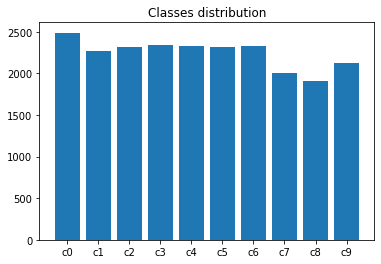

In [177]:
plt.bar(np.arange(len(classes)), np.unique(y, return_counts=True)[1])
plt.title('Classes distribution')
_ = plt.xticks(np.arange(len(classes)), classes)

In [329]:
len(y)

22424

In [282]:
indices = np.arange(len(y))
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y, indices, test_size=0.33, random_state=42)

In [284]:
test_idx


array([12922, 17403,  7648, ..., 12125, 12009,  1226])

In [285]:
X_train_saved_copy = X_train.copy()
y_train_saved_copy = y_train.copy()
X_test_saved_copy = X_test.copy()
y_test_saved_copy = y_test.copy()

Text(0.5, 1.0, 'test class distribution')

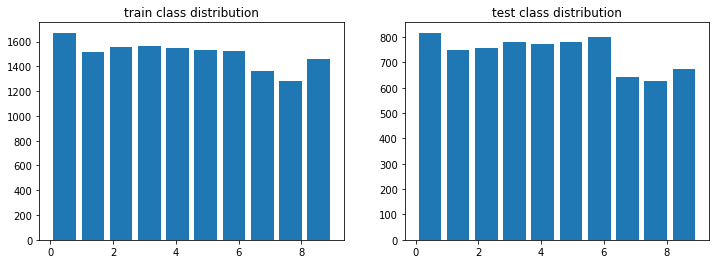

In [286]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(y_train, rwidth=0.8)
ax[1].hist(y_test, rwidth=0.8)
ax[0].set_title('train class distribution')
ax[1].set_title('test class distribution')

## Random forest

In [287]:
clf = RandomForestClassifier(random_state=0, n_estimators=500)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [288]:
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'test class distribution')

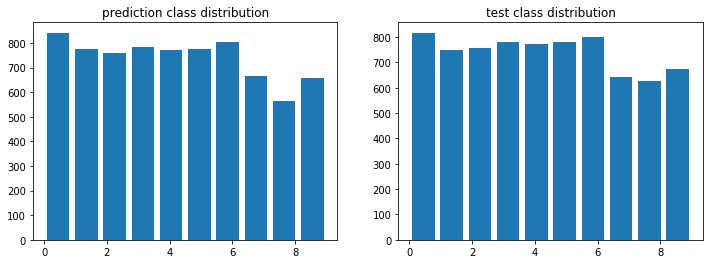

In [289]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(y_pred, rwidth=0.8)
ax[1].hist(y_test, rwidth=0.8)
ax[0].set_title('prediction class distribution')
ax[1].set_title('test class distribution')

In [290]:
def statistics(pred, test):
    pred = np.array(pred)
    test = np.array(test)
    accuracy = accuracy_score(pred, test)
    test = np.array(test)
    test_size = test.size
    tp_rf = np.intersect1d(np.argwhere(pred == 0)[:, 0], np.argwhere(test == 0)[:, 0]).size/test_size
    fn_rf = np.intersect1d(np.argwhere(pred != 0)[:, 0], np.argwhere(test == 0)[:, 0]).size/test_size

    tn_rf = np.intersect1d(np.argwhere(pred != 0)[:, 0], np.argwhere(test != 0)[:, 0]).size/test_size
    fp_rf = np.intersect1d(np.argwhere(pred == 0)[:, 0], np.argwhere(test != 0)[:, 0]).size/test_size
    
    recall = tp_rf/(tp_rf+fn_rf)
    precision = tp_rf/(tp_rf + fp_rf)
    f1 = 2*tp_rf/(2*tp_rf + fp_rf+fn_rf)
    return accuracy, tp_rf, fn_rf, tn_rf, fp_rf, recall, precision, f1

In [291]:
accuracy, tp_rf, fn_rf, tn_rf, fp_rf, recall, precision, f1 = statistics(y_pred, y_test)
accuracy, tp_rf, fn_rf, tn_rf, fp_rf, recall, precision, f1

(0.967027027027027,
 0.10662162162162162,
 0.0037837837837837837,
 0.8824324324324324,
 0.007162162162162162,
 0.9657282741738066,
 0.9370546318289786,
 0.9511754068716094)

In [292]:
print(
    f'\n \
    accuracy: {round(accuracy, 4)}, \n \
    true positive: {round(tp_rf, 4)}, \n \
    true negative: {round(tn_rf, 4)}, \n \
    false positive: {round(fp_rf, 4)}, \n \
    false negative: {round(fn_rf, 4)}, \n \
    recall: {round(recall, 4)}, \n \
    precision: {round(precision, 4)}, \n \
    f1: {round(f1, 4)}'
)


     accuracy: 0.967, 
     true positive: 0.1066, 
     true negative: 0.8824, 
     false positive: 0.0072, 
     false negative: 0.0038, 
     recall: 0.9657, 
     precision: 0.9371, 
     f1: 0.9512


### bad results:

In [294]:
wrong = np.argwhere(y_pred != y_test)[:, 0]



In [327]:
w_ind = np.random.randint(wrong.size)
t_ind = test_idx[wrong[w_ind]]

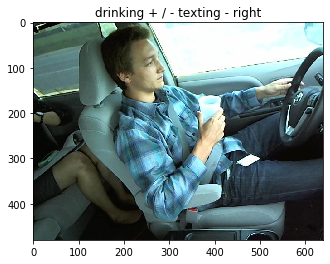

In [328]:
#plot random image with keypoints
row = keypoint_dict.iloc[t_ind]
kp_ind = string_to_list(row['keypoints'])
img_ind = row['img']
cl_ind = row['classname']
path = f'git/dataset/state-farm-distracted-driver-detection/imgs/train/{cl_ind}/{img_ind}'
img = io.imread(path)
plt.title(classes_dict[cl_ind] + ' + / - ' + classes_dict[classes[y_pred[wrong[w_ind]]]])
# plt.scatter([kp_ind[i] for i in range(0, len(kp_ind), 2)], [kp_ind[i] for i in range(1, len(kp_ind), 2)], color='red')
plt.imshow(img)

# for nn

In [217]:
import numpy as np
import torch
from torch import nn
from skimage import io
from torch.utils.data.sampler import SubsetRandomSampler


class ImagesDataset:
    def __init__(self, list_csv, train=True, transform=None,
                 image_path='../dataset/state-farm-distracted-driver-detection/imgs/train/',
                 device='cpu'):
        '''
        Args:
            path (string): path to images folder
            answers (DataFrame): data of keypoints in pandas dataframe format.
            train (Boolean) : True for train data with keypoints, default is True
            transform (callable, optional): Optional transform to be applied on
            sample
        '''
        self.list_csv = list_csv
        self.train = train
        self.transform = transform
        self.image_path = image_path
        self.device = device

    def __len__(self):
        return len(self.list_csv)

    def __getitem__(self, ind):
        cl = self.list_csv['classname'][ind]
        name = self.list_csv['img'][ind]
        # print(cl, name, self.list_csv.iloc[cl])
        mode = 'train' if self.train else 'val'

        image = io.imread(self.image_path + cl + '/' + name)
        sample = {'image': image, 'answer': cl}
        if self.transform:
            sample = self.transform(sample)
            # sample['image'] = sample['image'].to(self.device)
            # sample['answer'] = sample['answer'].to(self.device)
        return sample


class KeypointsDataset:
    def __init__(self, list_csv, train=True, transform=None):
        '''
        Args:
            path (string): path to images folder
            answers (DataFrame): data of keypoints in pandas dataframe format.
            train (Boolean) : True for train data with keypoints, default is True
            transform (callable, optional): Optional transform to be applied on
            sample
        '''
        self.list_csv = list_csv
        self.train = train

    def __len__(self):
        return len(self.list_csv)

    def __getitem__(self, ind):
        cl = self.list_csv['classname'][ind]
        kp = self.list_csv['keypoints'][ind]
        # print(cl, name, self.list_csv.iloc[cl])
        mode = 'train' if self.train else 'val'

        sample = {'keypoints': kp, 'answer': cl}
        return sample


class ImagesKeypointsDataset:
    def __init__(self, list_csv, train=True, transform=None,
                 image_path='../dataset/state-farm-distracted-driver-detection/imgs/train/',
                 device='cpu'):
        '''
        Args:
            path (string): path to images folder
            answers (DataFrame): data of keypoints in pandas dataframe format.
            train (Boolean) : True for train data with keypoints, default is True
            transform (callable, optional): Optional transform to be applied on
            sample
        '''
        self.list_csv = list_csv
        self.train = train
        self.transform = transform
        self.image_path = image_path
        self.device = device

    def __len__(self):
        return len(self.list_csv)

    def __getitem__(self, ind):
        cl = None
        if 'classname' in self.list_csv:
            cl = self.list_csv['classname'][ind]
        name = self.list_csv['img'][ind]
        kp = self._string_to_list(self.list_csv['keypoints'][ind])
        # print(cl, name, self.list_csv.iloc[cl])
        mode = 'train' if self.train else 'val'
        if cl:
            image = io.imread(self.image_path + cl + '/' + name)
            sample = {'image': image, 'answer': cl, 'keypoints': kp, 'name': name}
        else:
            image = io.imread(self.image_path + '/' + name)
            sample = {'image': image, 'keypoints': kp, 'name': name}

        if self.transform:
            sample = self.transform(sample)
            # sample['image'] = sample['image'].to(self.device)
            # sample['answer'] = sample['answer'].to(self.device)
        return sample

    def _string_to_list(self, list_str):
        list_str = list_str.replace('   ', ' ') \
            .replace('  ', ' ') \
            .replace('  ', ' ') \
            .replace('[ ', '') \
            .replace('[', '') \
            .replace(' ]', '') \
            .replace('] ', '') \
            .replace(']', '') \
            .replace('\n', '').split(' ')
        list_str = np.array([int(s) for s in list_str])
        return list_str


class Normalize(object):
    '''Normalize input images'''

    def __call__(self, sample):
        if 'answer' in sample:
            image, answer = sample['image'], sample['answer']
            if 'keypoints' in sample:
                return {'image': image / 255., 'answer': answer, 'keypoints': sample['keypoints'] / 640.}
            return {'image': image / 255.,  # scale to [0, 1]
                    'answer': answer}
        else:
            image = sample['image']
            if 'keypoints' in sample:
                return {'image': image / 255., 'keypoints': sample['keypoints'] / 640., 'name': sample['name']}
            return {'image': image / 255., 'name': sample['name']}


class MeanStd(object):
    '''Substract mean and divide on std input images'''

    def __call__(self, sample):
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        image = sample['image']
        for i in range(3):
            image[i] -= mean[i]
            image[i] /= std[i]
        if 'answer' in sample:

            if 'keypoints' in sample:
                return {'image': image, 'answer': sample['answer'], 'keypoints': sample['keypoints']}
            return {'image': image, 'answer': sample['answer']}
        else:
            image = sample['image']
            if 'keypoints' in sample:
                return {'image': image, 'keypoints': sample['keypoints'], 'name': sample['name']}
            return {'image': image, 'name': sample['name']}


class ToTensor(object):
    '''Convert ndarrays in sample to Tensors.'''

    def __call__(self, sample):
        if 'answer' in sample:
            image, answer = sample['image'], sample['answer']
            # swap color axis because
            # numpy image: H x W x C
            # torch image: C X H X W
            image = image.T
            image = torch.from_numpy(image)
            if 'keypoints' in sample:
                kp = torch.from_numpy(np.array(sample['keypoints']))
                return {'image': image, 'answer': answer, 'keypoints': kp}
            return {'image': image, 'answer': answer}
        else:
            image = sample['image']
            image = image.T
            image = torch.from_numpy(image)
            if 'keypoints' in sample:
                kp = torch.from_numpy(np.array(sample['keypoints']))
                return {'image': image, 'keypoints': kp, 'name': sample['name']}
            return {'image': image, 'name': sample['name']}


def prepare_train_valid_loaders(trainset, valid_size=0.2,
                                batch_size=128):
    '''
    Split trainset data and prepare DataLoader for training and validation

    Args:
        trainset (Dataset): data
        valid_size (float): validation size, defalut=0.2
        batch_size (int) : batch size, default=128
    '''

    # obtain training indices that will be used for validation
    num_train = len(trainset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # prepare data loaders
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               sampler=train_sampler)
    valid_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               sampler=valid_sampler)

    return train_loader, valid_loader



def train(train_loader, valid_loader, model, criterion, optimizer, device,
          n_epochs=100, saved_model='model.pt', nn_type='cnn'):
    '''
    Train the model

    Args:
        train_loader (DataLoader): DataLoader for train Dataset
        valid_loader (DataLoader): DataLoader for valid Dataset
        model (nn.Module): model to be trained on
        criterion (torch.nn): loss funtion
        optimizer (torch.optim): optimization algorithms
        n_epochs (int): number of epochs to train the model
        saved_model (str): file path for saving model

    Return:
        tuple of train_losses, valid_losses
    '''

    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf  # set initial "min" to infinity

    train_losses = []
    valid_losses = []

    for epoch in range(n_epochs):
        # monitor training loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()  # prep model for training
        for batch in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            if nn_type == 'kp':
                output = model(torch.DoubleTensor(string_to_list(batch['keypoints'])).to(device))
            elif nn_type == 'cnn':
                output = model(batch['image'].to(device).double(), batch['keypoints'].to(device).double()).to(device)
            elif nn_type == 'resnet':
                # for obj in gc.get_objects():
                #     if torch.is_tensor(obj):
                #         print(obj.size(), type(obj), obj.size())
                # print(batch['image'].to(device).double().shape)
                output = model(batch['image'].to(device).double()).to(device)
                # print(batch['image'].to(device).double().shape)

            # print('output shape: ', output.shape)
            # print('batch shape: ', batch['keypoints'].to(device).shape)
            # return 1, 1
            # calculate the loss

            answer = torch.zeros(len(batch['answer']))
            for i, cl in enumerate(batch['answer']):
                # answer[i][int(cl[1:])] = 1
                answer[i] = int(cl[1:])
            # print(output.shape, answer.shape)
            loss = criterion(output.double(), answer.to(device).long())
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()
            # print('train step ', train_num)

            # for obj in gc.get_objects():
            #     if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            #         print(reduce(op.mul, obj.size()) if len(obj.size()) > 0 else 0, type(obj), obj.size())

        ######################
        # validate the model #
        ######################
        model.eval()  # prep model for evaluation
        with torch.no_grad():
            for batch in valid_loader:
                # forward pass: compute predicted outputs by passing inputs to the model

                if nn_type == 'kp':
                    output = model(torch.DoubleTensor(string_to_list(batch['keypoints'])).to(device))
                elif nn_type == 'cnn':
                    output = model(batch['image'].to(device).double(), batch['keypoints'].to(device).double()).to(device)
                elif nn_type == 'resnet':
                    output = model(batch['image'].to(device).double()).data
                # calculate the loss
                answer = torch.zeros(len(batch['answer']))
                for i, cl in enumerate(batch['answer']):
                    # answer[i][int(cl[1:])] = 1
                    answer[i] = int(cl[1:])
                loss = criterion(output.double(), answer.to(device).long())
                # update running validation loss
                valid_loss += loss.item()
                # print('val step ', train_num)

        # print training/validation statistics
        train_loss = train_loss / len(train_loader.sampler.indices)
        valid_loss = valid_loss / len(valid_loader.sampler.indices)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'
              .format(epoch + 1, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
                  .format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), saved_model)
            valid_loss_min = valid_loss
            # print(answer, output)

    return train_losses, valid_losses


def string_to_list(list_str):
    for i in range(len(list_str)):
        list_str[i] = list_str[i].replace('[', '').replace(']', '').replace('\n', '').replace('  ', ' ').split(' ')
        list_str[i] = [int(s) for s in list_str[i]]
    # lists = [int(s) for s in strs]
    # print(list_str)
    return list_str


def eval_accuracy(eval_loader, model, device, nn_type='cnn', saved_model='cnn_model.pt'):
    model.load_state_dict(torch.load(saved_model, map_location=torch.device('cpu')))
    model.eval()
    correct = 0
    total = 0
    predictions = []
    test = []
    total_ind = 0
    for batch in eval_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        if nn_type == 'kp':
            output = model(torch.DoubleTensor(string_to_list(batch['keypoints'])).to(device))
        elif nn_type == 'cnn':
            output = model(batch['image'].to(device).double(), batch['keypoints'].to(device).double()).to(device)
        elif nn_type == 'resnet':
            output = model(batch['image'].to(device).double()).data

        # calculate the loss
        answer = torch.zeros(len(batch['answer']))
        for i, cl in enumerate(batch['answer']):
            answer[i] = int(cl[1:])
            if torch.argmax(output.double()[i]) == torch.tensor(answer[i]).long().to(device):
                correct += 1
            predictions.append(torch.argmax(output.double()[i]))
            test.append(answer[i])
        total += len(batch['answer'])
    print('eval accuracy ', correct / total)
    return predictions, test


In [197]:
class PretrainedResnet(nn.Module):
    def __init__(self, output_size=10, resnet_output_size=1000, pretrained_model=None):
        '''
        Build a forward network with arbitrary hidden layers.
        Arguments
            ---------
            input_size (integer): size of the input layer
            output_size (integer): size of the output layer
            hidden_layers (list of integers):, the sizes of each hidden layers
        '''
        super(PretrainedResnet, self).__init__()
        # hidden layers
        # layer_sizes = [(input_size, hidden_layers[0])] \
        #               + list(zip(hidden_layers[:-1], hidden_layers[1:]))
        # layer_sizes = [(input_size, hidden_layers[0])]
        # self.hidden_layers = nn.ModuleList([nn.Linear(h1, h2)
        #                                     for h1, h2 in layer_sizes])
        self.output = nn.Linear(resnet_output_size, output_size)
        self.norm = nn.BatchNorm1d(output_size)
        self.resnet = nn.DataParallel(pretrained_model)
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        #print(x.shape)
        # self.resnet.eval()
        x = self.resnet(x)
        #print(x.shape)
        x = self.output(x)
        x = self.norm(x)
        #print(x.shape)
        x = F.softmax(x)

        return x



In [218]:
import sys

import pandas as pd
import torch
from torch import optim
from torchvision import transforms
from torchvision.models import resnet18
import torch.nn.functional as F

# sys.path.insert(1, './pose_estimation')
# from cnn import MyCNN

IMG_SIZE = 64

test_size = 0.33
batch_size = 120

# Define a transform to normalize the data
tsfm = transforms.Compose([Normalize(), MeanStd(), ToTensor()])
path = "git/dataset/state-farm-distracted-driver-detection/"
img_path = "git/dataset/state-farm-distracted-driver-detection/imgs/"

driver_imgs_list = pd.read_csv(path + 'driver_imgs_list.csv')
trainset = ImagesDataset(driver_imgs_list, transform=tsfm, image_path=img_path + "resized_train2/")


In [221]:
_, test_loader = prepare_train_valid_loaders(trainset,
                                             test_size,
                                             batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [214]:
model_path = '../cv_project_staff/code2/code/resnet18_2_model.pt'

In [215]:
pretrained_model = resnet18(pretrained=True)
model = PretrainedResnet(pretrained_model=pretrained_model)
model = model.to(device)
model = model.double()

In [222]:
resnet_pred, resnet_test = eval_accuracy(test_loader, model, device, nn_type='resnet', saved_model=model_path)


/Users/pigunther/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/pigunther/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:369: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


eval accuracy  0.9932423300446006


In [229]:
resnet_pred_item = [r.item() for r in resnet_pred]

In [237]:
accuracy, tp_rf, fn_rf, tn_rf, fp_rf, recall, precision, f1 = statistics(resnet_pred_item, resnet_test)
print(
    f'\n \
    accuracy: {round(accuracy, 4)}, \n \
    true positive: {round(tp_rf, 4)}, \n \
    true negative: {round(tn_rf, 4)}, \n \
    false positive: {round(fp_rf, 4)}, \n \
    false negative: {round(fn_rf, 4)}, \n \
    recall: {round(recall, 4)}, \n \
    precision: {round(precision, 4)}, \n \
    f1: {round(f1, 4)}'
)


     accuracy: 0.9932, 
     true positive: 0.1069, 
     true negative: 0.8913, 
     false positive: 0.0014, 
     false negative: 0.0004, 
     recall: 0.9962, 
     precision: 0.9875, 
     f1: 0.9918


In [331]:
CNN_simple = nn.Sequential(
    nn.BatchNorm2d(3),
    nn.Conv2d(3, 64, (3, 3)),
    nn.BatchNorm2d(64),
    nn.MaxPool2d((3, 3)),
    nn.Conv2d(64, 32, (3, 3)),
    nn.BatchNorm2d(32),
    nn.MaxPool2d((3, 3)),
    nn.Conv2d(32, 16, (3, 3)),
    nn.ReLU(True),
    nn.BatchNorm2d(16),
    nn.MaxPool2d((3, 3)),
    nn.Flatten(),
    nn.Linear(576, 200),
    nn.ReLU(True),
    nn.BatchNorm1d(200),
    nn.Linear(200, 10),
    nn.Softmax()
)
model_path = '../cv_project_staff/code2/code/cnn_simple.pt'
model = CNN_simple
model = model.to(device)
model = model.double()

In [332]:
cnn_pred, cnn_test = eval_accuracy(test_loader, model, device, nn_type='resnet', saved_model=model_path)


/Users/pigunther/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/Users/pigunther/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:369: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


eval accuracy  0.9532369239086363


In [335]:
cnn_pred_item = [r.item() for r in cnn_pred]

In [336]:
accuracy, tp_rf, fn_rf, tn_rf, fp_rf, recall, precision, f1 = statistics(cnn_pred_item, cnn_test)
print(
    f'\n \
    accuracy: {round(accuracy, 4)}, \n \
    true positive: {round(tp_rf, 4)}, \n \
    true negative: {round(tn_rf, 4)}, \n \
    false positive: {round(fp_rf, 4)}, \n \
    false negative: {round(fn_rf, 4)}, \n \
    recall: {round(recall, 4)}, \n \
    precision: {round(precision, 4)}, \n \
    f1: {round(f1, 4)}'
)


     accuracy: 0.9532, 
     true positive: 0.1033, 
     true negative: 0.8826, 
     false positive: 0.0101, 
     false negative: 0.0041, 
     recall: 0.9622, 
     precision: 0.9106, 
     f1: 0.9357
